In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Importing Necessary Libraries 

### 1. Reading and Understanding the Data

In [2]:

data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.info()
#Checking the Columns for Null values able to observer that there aren't any.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Changing Categorical Variables to Understandable format.
data.season = data.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})
data.mnth = data.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})
data.weekday = data.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})


In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2. Exploratory Data Analysis


#### Since the number of rides is the target which improves business cnt variable is considered as the target variable and Analysis is being done against it. 

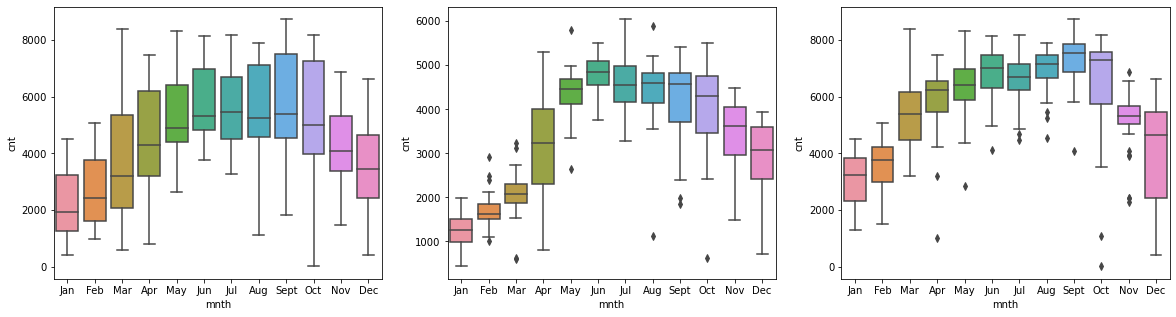

In [6]:
plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(1,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data  = data[data["yr"]==0])
plt.subplot(1,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data  = data[data["yr"]==1])

plt.show()

# We are able to observe that during the Middle Months the Usage is High compared to the year beginning and the end. 
# Another Observation is that compared to 2018 , 2019 has had an significant increase in Count.

<AxesSubplot:xlabel='season', ylabel='cnt'>

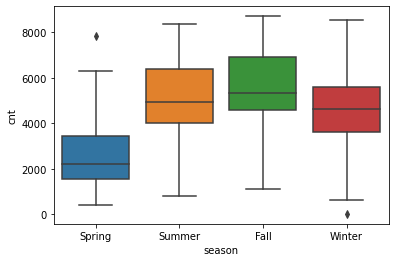

In [7]:
sns.boxplot(data = data, y= 'cnt',x='season')
# Able to observe that Summer and Fall have more Rides compared to Winter and Spring.

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

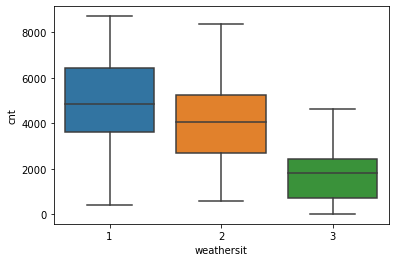

In [51]:
sns.boxplot(data = data, y= 'cnt',x='weathersit')


***
The weather situation Corresponds to 

1: Clear, Few clouds, Partly cloudy.

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
***


<AxesSubplot:xlabel='holiday', ylabel='cnt'>

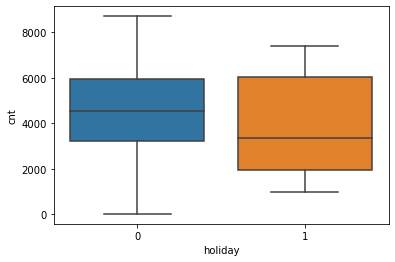

In [8]:
sns.boxplot(data = data, y= 'cnt',x='holiday')
# Able to observe that the holiday is having a slightly better effect on the Rides compared to a non Holiday.

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

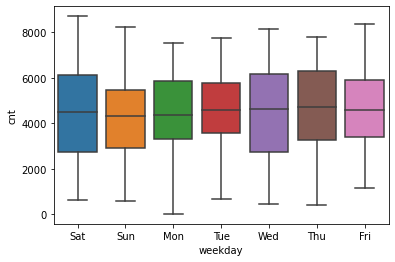

In [9]:
sns.boxplot(data = data, y= 'cnt',x='weekday')
# Not able to Observe any significance on the day , the overall distribution looks same.

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

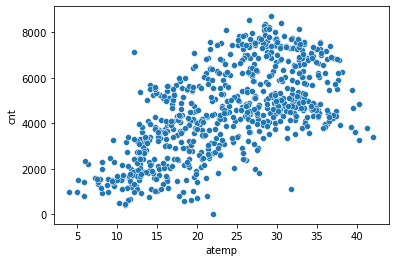

In [10]:
sns.scatterplot(data = data, y= 'cnt',x='atemp')
#We are able to observe that there is small Linear Relationship between atemp and Cnt

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

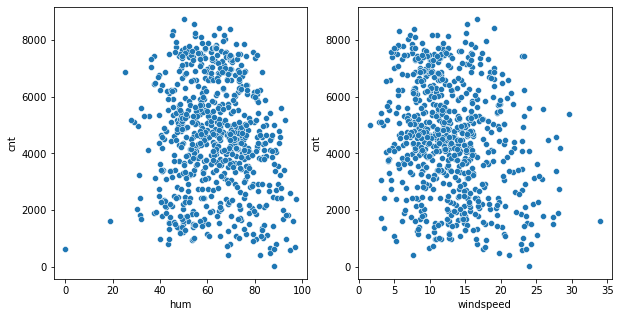

In [11]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(data = data, y= 'cnt',x='hum')
plt.subplot(1,2,2)
sns.scatterplot(data = data, y= 'cnt',x='windspeed')
# Not able to observe any relationship between cnt with Humidity and Windspeed.

<AxesSubplot:ylabel='registered'>

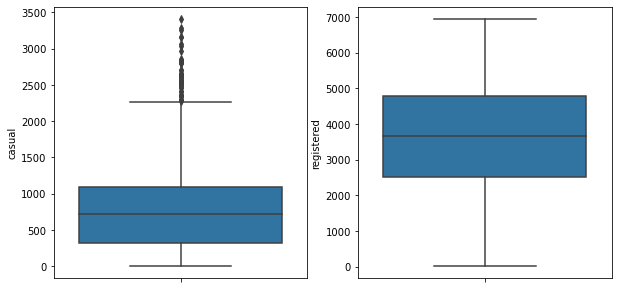

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.boxplot( y = 'casual', data = data)
plt.subplot(1,2,2)
sns.boxplot (y = 'registered', data  = data)
#The Registered users are using the services more than Casual Users.
#So bringing some kind of attractive offers to increase registerd users will increase sales

In [46]:
def plot_bar_columns(column):
 sns.barplot(column,'cnt',data=data, hue='yr')
 plt.legend(labels=['2018', '2019'])
 plt.show()

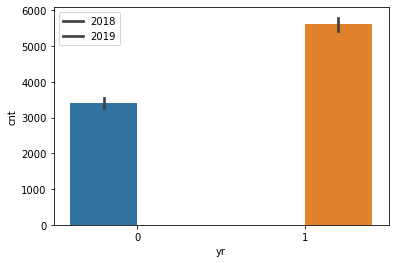

In [50]:
plot_bar_columns('yr')
# From this it is very clear that the 2019 sales are better than 2018.

<AxesSubplot:>

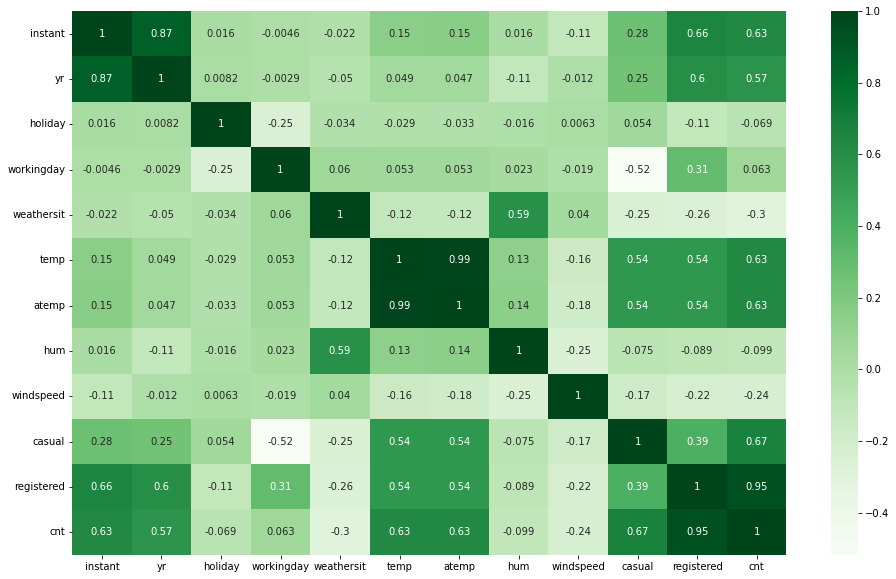

In [13]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True, cmap= 'Greens')

### 3.Model Readiness

In [14]:
#dropping unnecessary columns
modelData = data
modelData = modelData.drop(['instant','dteday','casual','registered'], axis=1)
modelData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600


#####  Adding Dummy Variables

In [15]:
# Seasons and WeatherSituation are not fixed so not dropping the first column.
dummy_random = pd.get_dummies(data=modelData,columns=['season','weathersit'])
dummy_random.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,weathersit_1,weathersit_2,weathersit_3
0,0,Jan,0,Sat,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,1,0
1,0,Jan,0,Sun,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0,1,0
2,0,Jan,0,Mon,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,1,0,0
3,0,Jan,0,Tue,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,1,0,0
4,0,Jan,0,Wed,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,1,0,0


In [16]:
# Months and Weekdays are  fixed so dropping the first column.
dummy_random = pd.get_dummies(data=dummy_random,columns=['mnth','weekday'],drop_first = True)
dummy_random.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,1


In [17]:
dummy_random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_Fall    730 non-null    uint8  
 9   season_Spring  730 non-null    uint8  
 10  season_Summer  730 non-null    uint8  
 11  season_Winter  730 non-null    uint8  
 12  weathersit_1   730 non-null    uint8  
 13  weathersit_2   730 non-null    uint8  
 14  weathersit_3   730 non-null    uint8  
 15  mnth_Aug       730 non-null    uint8  
 16  mnth_Dec       730 non-null    uint8  
 17  mnth_Feb       730 non-null    uint8  
 18  mnth_Jan  

In [18]:
model_data = dummy_random
model_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,0,0,0,0,0,0,1


### 4. Model Building

In [19]:
# Considering 70% of the data for train and 30% for the test.
df_train,df_test=train_test_split(model_data, train_size=0.7,random_state =100)
print(df_train.shape)
print(df_test.shape)

(510, 32)
(220, 32)


#####  Scaling Train Data

In [20]:
##Scaling Train Data
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,0,0,0,0


#####  Model Training

In [21]:
#Model Training Begins Populating X_train and y_train 
# Decided to use Backward Reinforcement Learning and RFE to evaluate the params that are necessary.
y_train = df_train.pop('cnt')
X_train = df_train

In [22]:
# Using RFE to Predict the variables to choose 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,step= 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [24]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Fall', False, 3),
 ('season_Spring', True, 1),
 ('season_Summer', False, 3),
 ('season_Winter', True, 1),
 ('weathersit_1', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 3),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 3),
 ('mnth_Jun', False, 3),
 ('mnth_Mar', False, 3),
 ('mnth_May', False, 3),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 3),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 3),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 3),
 ('weekday_Thu', False, 3),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 3)]

In [25]:
#Removing WeekDays as it is False in the RFE
X_train_1 = X_train.drop(['weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','weekday_Sat','weekday_Sun'], axis= 1)
X_train_1

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Fall,season_Spring,season_Summer,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept
576,1,0,1,0.815169,0.766351,0.725633,0.264686,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,1,0,...,0,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,0,...,1,0,0,0,0,0,0,0,0,0
79,0,0,1,0.462664,0.434043,0.759870,0.529881,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [26]:
X_train_sm1 = sm.add_constant(X_train_1)

lr = sm.OLS(y_train,X_train_sm1 )
lr_model= lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     117.5
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.87e-182
Time:                        15:17:32   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -989.0
Df Residuals:                     486   BIC:                            -887.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1526      0.026      5.830      0.000       0.101       0.204
yr                0.2310      0.008     28.351      0.000       0.215       0.247
holiday          -0.0761      0.027     -2.869      0.004      -0.128      -0.024
workingday        0.0160      0.009      1.811      0.071      -0.001       0.033
temp              0.4137      0.143      2.893      0.004       0.133       0.695
atemp             0.0376      0.139      0.270      0.787      -0.236       0.311
hum              -0.1671      0.039     -4.304      0.000      -0.243      -0.091
windspeed        -0.1843      0.027     -6.913      0.000      -0.237      -0.132
season_Fall       0.0101      0.020      0.514      0.607      -0.029       0.049
season_Spring    -0.0320      0.018     -1.826      0.068      -0.066       0.002
season_Summer     0.0559      0.015      3.774      0.000       0.027       0.085
season_Winter     0.1187      0.020      5.906      0.000       0.079       0.158
weathersit_1      0.1516      0.010     14.598      0.000       0.131       0.172
weathersit_2      0.0961      0.012      8.049      0.000       0.073       0.120
weathersit_3     -0.0950      0.021     -4.420      0.000      -0.137      -0.053
mnth_Aug          0.0274      0.034      0.800      0.424      -0.040       0.095
mnth_Dec         -0.0384      0.034     -1.131      0.259      -0.105       0.028
mnth_Feb         -0.0325      0.033     -0.975      0.330      -0.098       0.033
mnth_Jan         -0.0596      0.034     -1.755      0.080      -0.126       0.007
mnth_Jul         -0.0310      0.035     -0.875      0.382      -0.101       0.039
mnth_Jun          0.0067      0.025      0.265      0.791      -0.043       0.056
mnth_Mar          0.0046      0.025      0.186      0.852      -0.044       0.053
mnth_May          0.0255      0.021      1.193      0.233      -0.017       0.068
mnth_Nov         -0.0371      0.037     -1.008      0.314      -0.109       0.035
mnth_Oct          0.0091      0.036      0.251      0.802      -0.062       0.080
mnth_Sept         0.0922      0.032      2.852      0.005       0.029       0.156
==============================================================================
Omnibus:                       70.157   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.415
Skew:                          -0.660   Prob(JB):                     3.02e-44
Kurtosis:                       5.772   Cond. No.                     1.19e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.33e-29. This might indicate that there are
strong multicollinearity problems or that the design ma

In [27]:
#Dropping aTemp as P-value is High and also is highly correlated with temp
X_train_2 = X_train_1.drop(['atemp'], axis= 1)
X_train_sm_2 = sm.add_constant(X_train_2)

lr = sm.OLS(y_train,X_train_sm_2 )
lr_model= lr.fit()
lr_model.summary()
# Though R2 is same Adj.R2 has increased a little bit.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.34e-183
Time:                        15:17:32   Log-Likelihood:                 518.48
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     487   BIC:                            -893.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1528      0.026      5.841      0.000       0.101       0.204
yr                0.2310      0.008     28.380      0.000       0.215       0.247
holiday          -0.0765      0.026     -2.890      0.004      -0.128      -0.024
workingday        0.0159      0.009      1.810      0.071      -0.001       0.033
temp              0.4502      0.047      9.639      0.000       0.358       0.542
hum              -0.1667      0.039     -4.301      0.000      -0.243      -0.091
windspeed        -0.1858      0.026     -7.137      0.000      -0.237      -0.135
season_Fall       0.0099      0.020      0.503      0.615      -0.029       0.048
season_Spring    -0.0320      0.018     -1.824      0.069      -0.066       0.002
season_Summer     0.0561      0.015      3.792      0.000       0.027       0.085
season_Winter     0.1188      0.020      5.918      0.000       0.079       0.158
weathersit_1      0.1518      0.010     14.682      0.000       0.131       0.172
weathersit_2      0.0963      0.012      8.085      0.000       0.073       0.120
weathersit_3     -0.0953      0.021     -4.445      0.000      -0.137      -0.053
mnth_Aug          0.0262      0.034      0.772      0.440      -0.040       0.093
mnth_Dec         -0.0384      0.034     -1.132      0.258      -0.105       0.028
mnth_Feb         -0.0326      0.033     -0.979      0.328      -0.098       0.033
mnth_Jan         -0.0598      0.034     -1.761      0.079      -0.126       0.007
mnth_Jul         -0.0318      0.035     -0.900      0.369      -0.101       0.038
mnth_Jun          0.0058      0.025      0.232      0.816      -0.043       0.055
mnth_Mar          0.0045      0.025      0.180      0.857      -0.044       0.053
mnth_May          0.0250      0.021      1.174      0.241      -0.017       0.067
mnth_Nov         -0.0371      0.037     -1.010      0.313      -0.109       0.035
mnth_Oct          0.0090      0.036      0.248      0.804      -0.062       0.080
mnth_Sept         0.0917      0.032      2.844      0.005       0.028       0.155
==============================================================================
Omnibus:                       69.663   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.621
Skew:                          -0.656   Prob(JB):                     7.41e-44
Kurtosis:                       5.761   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
# Calculating VIF
X_train_new = X_train_sm_2.drop(['const'], axis=1)

In [29]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_3,inf
6,season_Fall,inf
7,season_Spring,inf
8,season_Summer,inf
9,season_Winter,inf
10,weathersit_1,inf
11,weathersit_2,inf
3,temp,7.06
21,mnth_Nov,6.75
22,mnth_Oct,6.46


In [30]:
#Dropping weathersit and season because VIF is infinite.
X_train_3 = X_train_2.drop(['weathersit_3','weathersit_2','weathersit_1','season_Spring','season_Fall','season_Summer','season_Winter'], axis= 1)
X_train_sm_3 = sm.add_constant(X_train_3)

lr_3 = sm.OLS(y_train,X_train_sm_3 )
lr_model_3= lr.fit()
lr_model_3.summary()
# Though R2 and Adj R2 have reduced the reliability has increased.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):          6.34e-183
Time:                        15:17:32   Log-Likelihood:                 518.48
No. Observations:                 510   AIC:                            -991.0
Df Residuals:                     487   BIC:                            -893.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1528      0.026      5.841      0.000       0.101       0.204
yr                0.2310      0.008     28.380      0.000       0.215       0.247
holiday          -0.0765      0.026     -2.890      0.004      -0.128      -0.024
workingday        0.0159      0.009      1.810      0.071      -0.001       0.033
temp              0.4502      0.047      9.639      0.000       0.358       0.542
hum              -0.1667      0.039     -4.301      0.000      -0.243      -0.091
windspeed        -0.1858      0.026     -7.137      0.000      -0.237      -0.135
season_Fall       0.0099      0.020      0.503      0.615      -0.029       0.048
season_Spring    -0.0320      0.018     -1.824      0.069      -0.066       0.002
season_Summer     0.0561      0.015      3.792      0.000       0.027       0.085
season_Winter     0.1188      0.020      5.918      0.000       0.079       0.158
weathersit_1      0.1518      0.010     14.682      0.000       0.131       0.172
weathersit_2      0.0963      0.012      8.085      0.000       0.073       0.120
weathersit_3     -0.0953      0.021     -4.445      0.000      -0.137      -0.053
mnth_Aug          0.0262      0.034      0.772      0.440      -0.040       0.093
mnth_Dec         -0.0384      0.034     -1.132      0.258      -0.105       0.028
mnth_Feb         -0.0326      0.033     -0.979      0.328      -0.098       0.033
mnth_Jan         -0.0598      0.034     -1.761      0.079      -0.126       0.007
mnth_Jul         -0.0318      0.035     -0.900      0.369      -0.101       0.038
mnth_Jun          0.0058      0.025      0.232      0.816      -0.043       0.055
mnth_Mar          0.0045      0.025      0.180      0.857      -0.044       0.053
mnth_May          0.0250      0.021      1.174      0.241      -0.017       0.067
mnth_Nov         -0.0371      0.037     -1.010      0.313      -0.109       0.035
mnth_Oct          0.0090      0.036      0.248      0.804      -0.062       0.080
mnth_Sept         0.0917      0.032      2.844      0.005       0.028       0.155
==============================================================================
Omnibus:                       69.663   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              198.621
Skew:                          -0.656   Prob(JB):                     7.41e-44
Kurtosis:                       5.761   Cond. No.                     2.37e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Important Variables
***
The variables that are considered are done based on the correlation they had to the target variable.
1. Year has a significance on the demand for bikes as the restrictions are easing and people are traveling more.
2. Holiday is also having a good significance so having that too in the model.
3. temp and hue though are not in correlation the p values are significantly low so considering them for 
4. Season, Weather Situation, and Months are to be considered as they are having low but quite an effect on the demand for the rides.  
***

#### Model Interpretation
***
We can observe that the R2 value for the model has come out significantly well and have to test it against the test data. 
In the terms of reliability, it is more reliable as the Prob(F-statistic) is very close to zero which implies the model is reliable.

Though VIF is inifinite for a few variables since it has a good correlation with the target variable we have chosen not to drop those.
***

####  Considering the above analysis assuming model 2 to be good FIR as it has a good R2 and ADJ R2 Value

### 5. Residual Analysis of the train data


In [31]:
y_train_RN = lr_model.predict(X_train_sm_2)

In [32]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

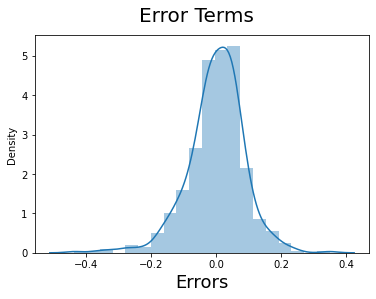

In [33]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_RN), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [34]:
# The Errors are normally distributed. Makes our assumption correct.

### Testing Model Against Test Data

In [35]:
# Sacling Test data Before Prediction
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.245455,0.254545,...,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.431338,0.436599,...,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
y_test = df_test.pop('cnt')
X_test = df_test

In [37]:
X_test = X_test.drop(['atemp','weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','weekday_Sat','weekday_Sun'], axis= 1)
X_test_sm = sm.add_constant(X_test)



### Model Evaluation

In [39]:
y_test_pred = lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

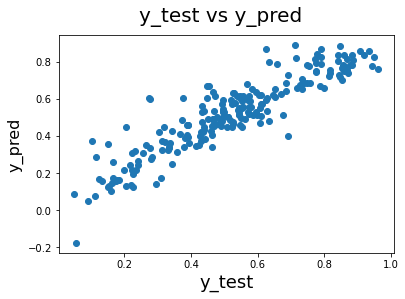

In [40]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [41]:

r2_score(y_true = y_test,y_pred =y_test_pred )

0.8242438653097373

#### The R2 Value on the test data turns out to be 0.82. Concluding the training with this R2 Value